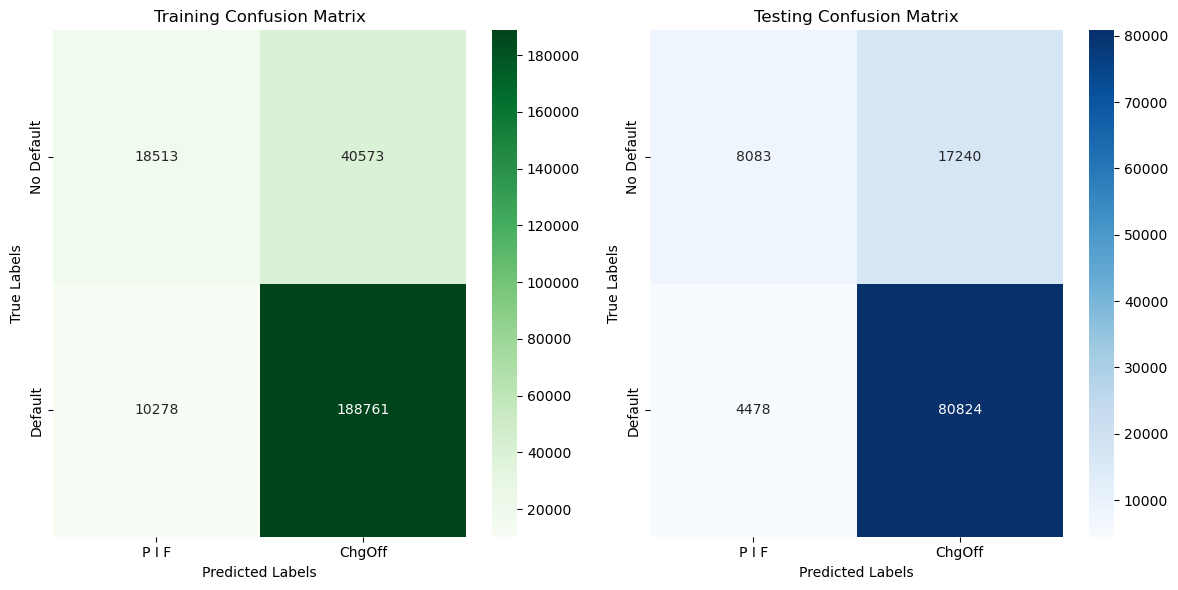

Training Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.31      0.42     59086
           1       0.82      0.95      0.88    199039

    accuracy                           0.80    258125
   macro avg       0.73      0.63      0.65    258125
weighted avg       0.78      0.80      0.78    258125

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.32      0.43     25323
           1       0.82      0.95      0.88     85302

    accuracy                           0.80    110625
   macro avg       0.73      0.63      0.65    110625
weighted avg       0.78      0.80      0.78    110625



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SBAnational_clean.csv')

# Define features and target
feature_cols = ['DisbursementGross', 'Term', 'LoanToApprovalRatio','NoEmp','NAICS_Accommodation_FoodServices','NAICS_Administrative_Support_WasteManagement_RemediationServices',
                'NAICS_Agriculture_Forestry_Fishing_Hunting', 'NAICS_Arts_Entertainment_Recreation', 'NAICS_Construction', 'NAICS_EducationalServices','NAICS_Finance_Insurance',
                'NAICS_HealthCare_SocialAssistance','NAICS_Information', 'NAICS_ManagementOfCompanies_Enterprises', 'NAICS_Mining_Quarrying_Oil_GasExtraction',
                'NAICS_OtherServices', 'NAICS_Professional_Scientific_TechnicalServices', 'NAICS_PublicAdministration', 'NAICS_RealEstate_Rental_Leasing', 'NAICS_Utilities',
                'NAICS_WholesaleTrade']
X = df[feature_cols]
y = df['MIS_Status']

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Define the logistic regression model with best parameters
logit_reg = LogisticRegression(
    max_iter=1000,
    C=10,
    class_weight=None,
    penalty='l1',
    solver='liblinear'
)

# Fit the model to the training data
logit_reg.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = logit_reg.predict(X_train)
y_test_pred = logit_reg.predict(X_test)

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualize training confusion matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=['P I F', 'ChgOff'], yticklabels=['No Default', 'Default'])
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Visualize testing confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['P I F', 'ChgOff'], yticklabels=['No Default', 'Default'])
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Print classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))


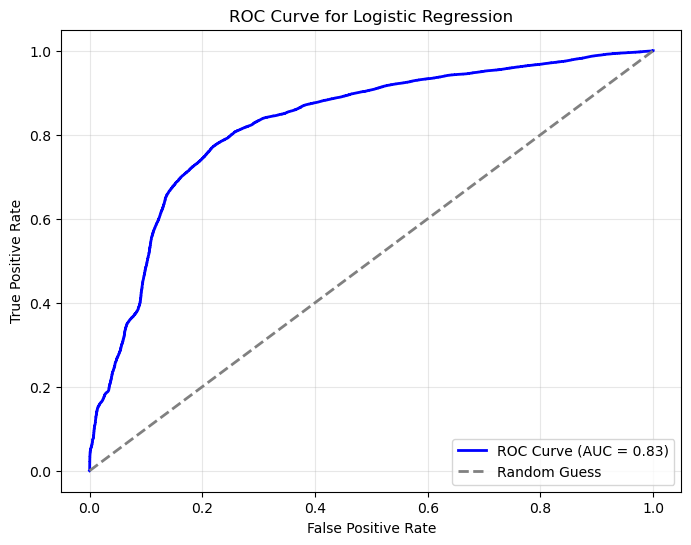

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_test_probs = logit_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
